# Assignment: Predicting Chemotherapy-Induced Nausea and Vomiting

**Objective:** Develop a decision tree model to predict the likelihood of chemotherapy-induced nausea and vomiting in patients based on the provided dataset.

[**Dataset Overview:**](https://docs.google.com/spreadsheets/d/1Ug0tCwBA0-xzAIv2m6x57P-L7xFsh130/edit?usp=sharing&ouid=111082459268756161652&rtpof=true&sd=true) The dataset contains information on patients who have undergone chemotherapy for breast cancer. It includes various attributes such as patient demographics, treatment details, and nausea/vomiting occurrences. Linked [here](https://docs.google.com/spreadsheets/d/1Ug0tCwBA0-xzAIv2m6x57P-L7xFsh130/edit?usp=sharing&ouid=111082459268756161652&rtpof=true&sd=true).


##### **Libraries imports**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


##### **Loading data**

In [116]:
file_path = 'Data/cancer_data.xlsx'
xls = pd.ExcelFile(file_path)

for sheet_name in xls.sheet_names:
  print(f"Sheet name: {sheet_name}")
  df = pd.read_excel(xls, sheet_name=sheet_name)
  display(df)

Sheet name: C4EMetadata


,Unnamed: 0
0,2
1,int.example:81b33a1a-49c3-4746-89ae-095beee450...
2,"<RepositoryItem xmlns=""http://ns.colectica.com..."
3,"<RepositoryItem xmlns=""http://ns.colectica.com..."
4,"<RepositoryItem xmlns=""http://ns.colectica.com..."
...,...
1089,"<RepositoryItem xmlns=""http://ns.colectica.com..."
1090,"<RepositoryItem xmlns=""http://ns.colectica.com..."
1091,"<RepositoryItem xmlns=""http://ns.colectica.com..."
1092,"<RepositoryItem xmlns=""http://ns.colectica.com..."


Sheet name: Variable View


,Patient_Code,Gender,Age,Weight,Height,BMI,BSA,Marital_Status,Religion,County_of_Residence,...,Day_3_Vomiting,Number_of_Day_3_Vomiting_Episodes,Day_4_Nausea,Scale_of_Day_4_Nausea,Day_4_Vomiting,Number_of_Day_4_Vomiting_Episodes,Day_5_Nausea,Scale_of_Day_5_Nausea,Day_5_Vomiting,Number_of_Day_5_Vomiting_Episodes
0,200,Female,45,52,1.62,19.81,1.530,Married,Christian,Nairobi,...,No,0,Yes,3,No,0,Yes,1,No,0
1,300,Female,32,56,1.62,21.15,1.680,Single,Christian,Nairobi,...,No,0,No,0,No,0,Yes,7,Yes,1
2,500,Female,46,88,1.61,33.95,1.917,Divorced,Christian,Kiambu,...,No,0,No,0,No,0,No,0,No,0
3,600,Female,41,54,1.55,22.48,1.606,Married,Christian,Nairobi,...,No,0,No,0,No,0,No,0,No,0
4,800,Female,37,45,1.50,20.00,1.369,Married,Christian,Kiambu,...,No,0,No,0,No,0,No,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,10900,Female,37,48,1.54,20.24,1.410,Single,Christian,Muranga,...,No,0,No,0,No,0,No,0,No,0
106,11000,Female,68,62,1.68,21.97,1.650,Married,Christian,Muranga,...,No,0,No,0,No,0,No,0,No,0
107,11100,Female,58,56,1.52,24.24,1.670,Married,Christian,Kiambu,...,No,0,No,0,No,0,No,0,No,0
108,11200,Female,33,56,1.62,21.34,1.680,Single,Christian,Nairobi,...,No,0,Yes,6,No,0,Yes,5,Yes,1


Sheet name: Data View


,Patient_Code,Gender,Age,Weight,Height,BMI,BSA,Marital_Status,Religion,County_of_Residence,...,Day_3_Vomiting,Number_of_Day_3_Vomiting_Episodes,Day_4_Nausea,Scale_of_Day_4_Nausea,Day_4_Vomiting,Number_of_Day_4_Vomiting_Episodes,Day_5_Nausea,Scale_of_Day_5_Nausea,Day_5_Vomiting,Number_of_Day_5_Vomiting_Episodes
0,200,1,45,52.0,1.62,19.814053,1.530,1,0,Nairobi,...,1,0,0,3,1,0,0,1,1,0
1,300,1,32,55.5,1.62,21.147691,1.680,0,0,Nairobi,...,1,0,1,0,1,0,0,7,0,1
2,500,1,46,88.0,1.61,33.949308,1.917,3,0,Kiambu,...,1,0,1,0,1,0,1,0,1,0
3,600,1,41,54.0,1.55,22.476587,1.606,1,0,Nairobi,...,1,0,1,0,1,0,1,0,1,0
4,800,1,37,45.0,1.50,20.000000,1.369,1,0,Kiambu,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,10900,1,37,48.0,1.54,20.239501,1.410,0,0,Muranga,...,1,0,1,0,1,0,1,0,1,0
106,11000,1,68,62.0,1.68,21.967120,1.650,1,0,Muranga,...,1,0,1,0,1,0,1,0,1,0
107,11100,1,58,56.0,1.52,24.238227,1.670,1,0,Kiambu,...,1,0,1,0,1,0,1,0,1,0
108,11200,1,33,56.0,1.62,21.338211,1.680,0,0,Nairobi,...,1,0,0,6,1,0,0,5,0,1


Sheet name: Data Dictionary


,Name,Type,Width,Decimals,Label,Values,Missing,Columns,Alignment,Measure,Role
0,Patient_Code,Numeric,8,0,Patient Anonymous Code,NaN,NaN,8,Right,Nominal,Input
1,Gender,Numeric,8,0,Gender,"{0, Male}...",NaN,8,Right,Nominal,Input
2,Age,Numeric,8,0,Age (years),NaN,NaN,8,Right,Scale,Input
3,Weight,Numeric,8,0,Weight (kg),NaN,NaN,8,Right,Scale,Input
4,Height,Numeric,8,2,Height (metres),NaN,NaN,8,Right,Scale,Input
5,BMI,Numeric,8,2,Body Mass Index (kg/m2),NaN,NaN,8,Right,Scale,Input
6,BSA,Numeric,8,3,Body Surface Area (m2),NaN,NaN,8,Right,Scale,Input
7,Marital_Status,Numeric,8,0,Marital Status,"{0, Single}...",NaN,8,Right,Nominal,Input
8,Religion,Numeric,8,0,Religion,"{0, Christian}...",NaN,8,Right,Nominal,Input
9,County_of_Residence,String,7,0,County of Residence,NaN,NaN,8,Left,Nominal,Input


In [117]:
data_view = pd.read_excel(xls, sheet_name=xls.sheet_names[2])
display(data_view)

,Patient_Code,Gender,Age,Weight,Height,BMI,BSA,Marital_Status,Religion,County_of_Residence,...,Day_3_Vomiting,Number_of_Day_3_Vomiting_Episodes,Day_4_Nausea,Scale_of_Day_4_Nausea,Day_4_Vomiting,Number_of_Day_4_Vomiting_Episodes,Day_5_Nausea,Scale_of_Day_5_Nausea,Day_5_Vomiting,Number_of_Day_5_Vomiting_Episodes
0,200,1,45,52.0,1.62,19.814053,1.530,1,0,Nairobi,...,1,0,0,3,1,0,0,1,1,0
1,300,1,32,55.5,1.62,21.147691,1.680,0,0,Nairobi,...,1,0,1,0,1,0,0,7,0,1
2,500,1,46,88.0,1.61,33.949308,1.917,3,0,Kiambu,...,1,0,1,0,1,0,1,0,1,0
3,600,1,41,54.0,1.55,22.476587,1.606,1,0,Nairobi,...,1,0,1,0,1,0,1,0,1,0
4,800,1,37,45.0,1.50,20.000000,1.369,1,0,Kiambu,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,10900,1,37,48.0,1.54,20.239501,1.410,0,0,Muranga,...,1,0,1,0,1,0,1,0,1,0
106,11000,1,68,62.0,1.68,21.967120,1.650,1,0,Muranga,...,1,0,1,0,1,0,1,0,1,0
107,11100,1,58,56.0,1.52,24.238227,1.670,1,0,Kiambu,...,1,0,1,0,1,0,1,0,1,0
108,11200,1,33,56.0,1.62,21.338211,1.680,0,0,Nairobi,...,1,0,0,6,1,0,0,5,0,1


In [118]:
print(data_view.dtypes)

Patient_Code                                                    int64
Gender                                                          int64
Age                                                             int64
Weight                                                        float64
Height                                                        float64
BMI                                                           float64
BSA                                                           float64
Marital_Status                                                  int64
Religion                                                        int64
County_of_Residence                                            object
Smoking_Status                                                  int64
Drinking_Status                                                 int64
Last_Meal_Before_Chemotherapy                                   int64
Stage_of_Breast_Cancer                                          int64
Duration_of_Illness 

In [119]:
for col in data_view.columns[1:36]:
  unique_values = data_view[col].unique()
  print(f"Column: {col}")
  print(f"Unique values: {unique_values}")
  print("\n")

Column: Gender
Unique values: [1]


Column: Age
Unique values: [45 32 46 41 37 49 43 53 36 31 55 50 58 62 69 47 48 40 42 63 77 54 56 52
 68 29 33 65 25 39 51 73 24 60 44 35 38]


Column: Weight
Unique values: [ 52.   55.5  88.   54.   45.   82.   72.   56.   59.   71.   65.   76.
  74.   65.5  95.   69.   63.   68.   83.   90.   49.   85.   73.   55.
  53.   70.   64.   60.   92.5  79.   89.   61.   80.   46.   48.5  38.
  94.   67.   97.   58.   96.   75.   84.   77.   93.5  88.5  81.   41.
 102.   62.   43.   54.5  87.   42.   99.   48. ]


Column: Height
Unique values: [1.62  1.61  1.55  1.5   1.73  1.69  1.59  1.51  1.7   1.56  1.65  1.58
 1.52  1.43  1.53  1.57  1.63  1.67  1.48  1.64  1.6   1.66  1.705 1.68
 1.54  1.72  1.535 1.42  1.715 1.543 1.555 1.76 ]


Column: BMI
Unique values: [19.81405274 21.1476909  33.94930751 22.47658689 20.         27.39817568
 25.20920136 17.7999288  24.5603263  20.41522491 27.05380277 29.58579882
 25.07619305 27.91551882 29.64268547 28.13365651 24.

##### **Categorical and Numerical Features**

Based on the unique values, the following features from are identified as categorical:

**Categorical Features:**
- Smoking_Status: [1, 2, 0]
- Drinking_Status: [1, 2, 0]
- Last_Meal_Before_Chemotherapy: [0, 1]
- Stage_of_Breast_Cancer: [8, 5, 9, 4, 6, 3, 7, 1]
- Morning_Sickness_During_Pregnancy: [0, 1]
- Comorbidities: [10, 9, 11, 12, 0, 13, 14]
- Cycle: [3, 4, 6, 1, 2, 5, 7, 10, 8]
- Chemotherapy_Regimen: [0, 1, 4, 5, 6, 7, 2, 8, 9, 10]
- Chemotherapy_Frequency: [0, 3, 1, 2]
- Ondansetron: [1, 0, 2]
- Dexamethasone: [0, 1, 2, 3]
- Granisetron: [0, 1]
- Oral_Dexamethasone: [0, 1]
- Metoclopramide_10mg_TDS_PO: [0, 1]
- Metoclopramide_10mg_IV: [0, 1]
- Palonosetron: [0, 1]
- Other_Antiemetics: [0, 1, 2, 3, 4]
- CINV_Route: [0]
- CINV_Frequency: [0, 1]
- CINV_Time_of_Administration: [0]
- Anticipatory_Vomiting: [0, 1]

**Numerical Features:**
- BMI: [19.81405274, 21.1476909, 33.94930751, ...]
- Age: [25, 30, 35, ...]
- BSA: [1.53, 1.68, 1.917, ...]
- Duration_of_Illness: [4, 12, 6, 9, 24, ...]

##### **Decision Tree Model with Numerical Features only**

In [120]:
selected_features=['BMI', 'Age', 'BSA','Duration_of_Illness','Nausea_within_24_hours_post_Chemotherapy']

In [121]:
df_selected = data_view[selected_features]
display(df_selected)

,BMI,Age,BSA,Duration_of_Illness,Nausea_within_24_hours_post_Chemotherapy
0,19.814053,45,1.530,4,0
1,21.147691,32,1.680,12,0
2,33.949308,46,1.917,12,0
3,22.476587,41,1.606,12,0
4,20.000000,37,1.369,6,0
...,...,...,...,...,...
105,20.239501,37,1.410,8,1
106,21.967120,68,1.650,24,1
107,24.238227,58,1.670,9,0
108,21.338211,33,1.680,12,0


Accuracy: 0.6428571428571429
Confusion Matrix:
[[16  8]
 [ 2  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        24
           1       0.20      0.50      0.29         4

    accuracy                           0.64        28
   macro avg       0.54      0.58      0.52        28
weighted avg       0.79      0.64      0.69        28



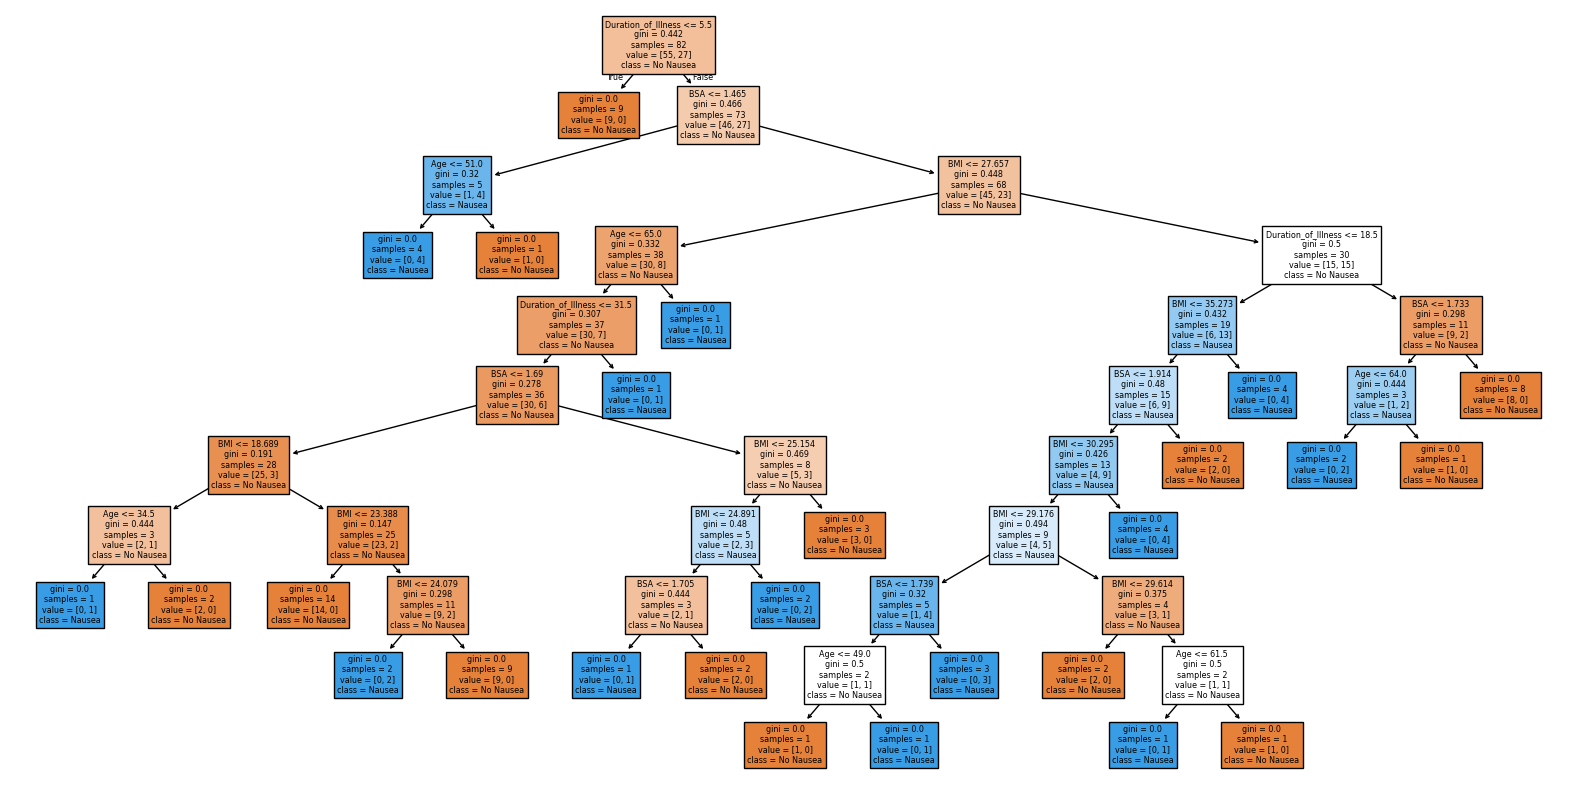

In [122]:
X = df_selected[['BMI', 'Age', 'BSA', 'Duration_of_Illness']]
y = df_selected['Nausea_within_24_hours_post_Chemotherapy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No Nausea', 'Nausea'], filled=True)
plt.show()

##### **Decision Tree Model with Categorical Features included** 

In [123]:
highly_relevant_features = [
    "Chemotherapy_Regimen",
    "Chemotherapy_Frequency",
    "Stage_of_Breast_Cancer",
    "Ondansetron",
    "Dexamethasone",
    "Granisetron",
    "Palonosetron",
    "Morning_Sickness_During_Pregnancy",
    "Cycle",
    "Anticipatory_Vomiting",'Nausea_within_24_hours_post_Chemotherapy'
]

In [124]:
df_highly_relevant = data_view[highly_relevant_features]

categorical_features = [
  "Chemotherapy_Regimen",
  "Chemotherapy_Frequency",
  "Stage_of_Breast_Cancer",
  "Ondansetron",
  "Dexamethasone",
  "Granisetron",
  "Palonosetron",
  "Morning_Sickness_During_Pregnancy",
  "Cycle",
  "Anticipatory_Vomiting"
]

df_highly_relevant = pd.get_dummies(df_highly_relevant, columns=categorical_features)

display(df_highly_relevant)

,Nausea_within_24_hours_post_Chemotherapy,Chemotherapy_Regimen_0,Chemotherapy_Regimen_1,Chemotherapy_Regimen_2,Chemotherapy_Regimen_4,Chemotherapy_Regimen_5,Chemotherapy_Regimen_6,Chemotherapy_Regimen_7,Chemotherapy_Regimen_8,Chemotherapy_Regimen_9,...,Cycle_2,Cycle_3,Cycle_4,Cycle_5,Cycle_6,Cycle_7,Cycle_8,Cycle_10,Anticipatory_Vomiting_0,Anticipatory_Vomiting_1
0,0,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,0,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,0,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,0,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
106,1,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
107,0,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
108,0,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


Accuracy: 0.6785714285714286
Confusion Matrix:
[[18  2]
 [ 7  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        20
           1       0.33      0.12      0.18         8

    accuracy                           0.68        28
   macro avg       0.53      0.51      0.49        28
weighted avg       0.61      0.68      0.62        28



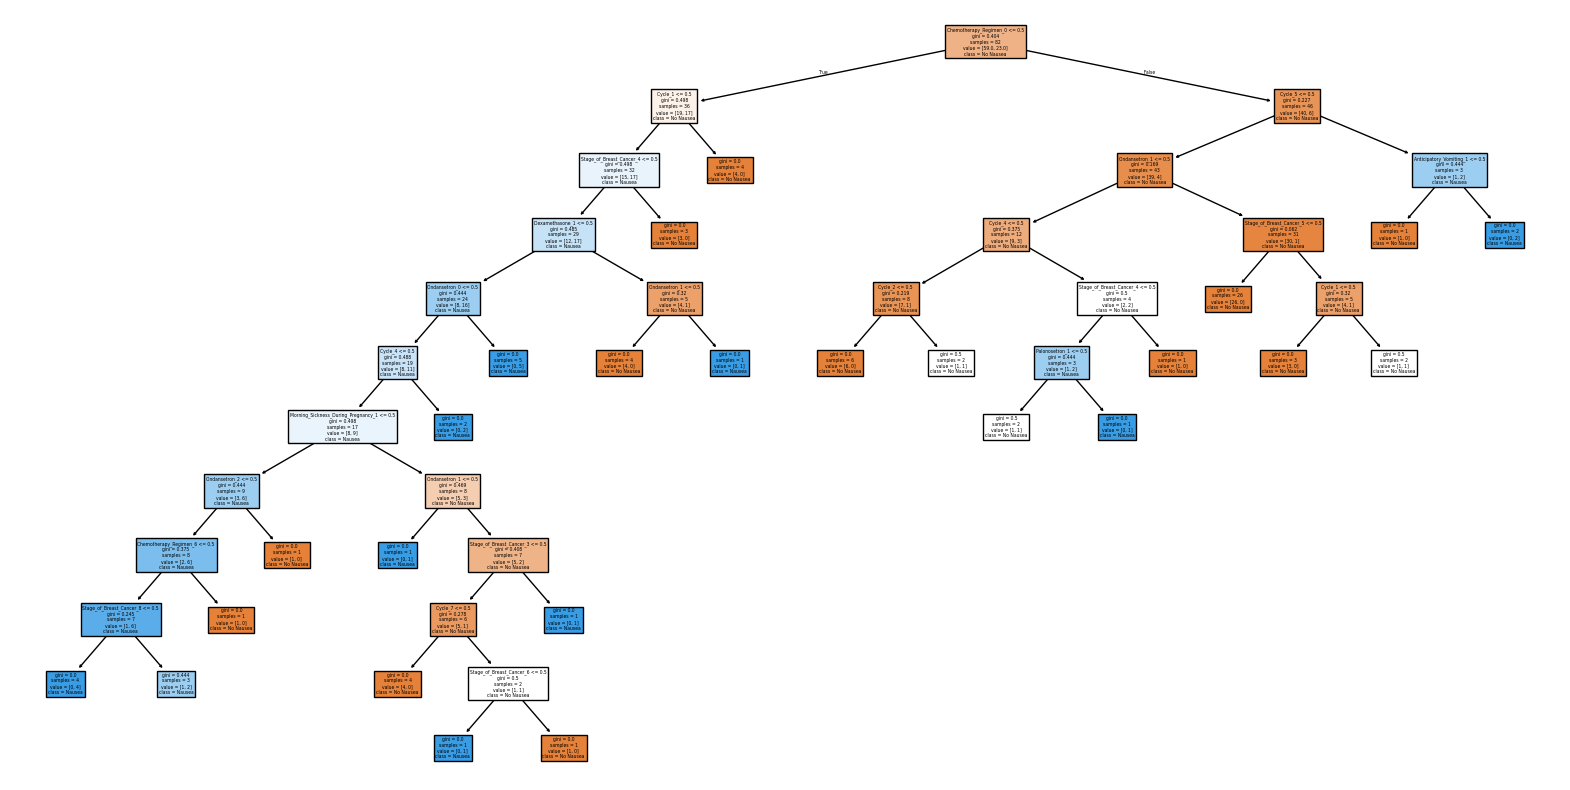

In [125]:
X = df_highly_relevant.drop(columns=['Nausea_within_24_hours_post_Chemotherapy'])
y = df_highly_relevant['Nausea_within_24_hours_post_Chemotherapy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No Nausea', 'Nausea'], filled=True)
plt.show()

In [126]:
nausea_counts = df_highly_relevant['Nausea_within_24_hours_post_Chemotherapy'].value_counts
print(nausea_counts())

Nausea_within_24_hours_post_Chemotherapy
0    79
1    31
Name: count, dtype: int64


Accuracy: 0.75
Confusion Matrix:
[[19  1]
 [ 6  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.67      0.25      0.36         8

    accuracy                           0.75        28
   macro avg       0.71      0.60      0.60        28
weighted avg       0.73      0.75      0.71        28



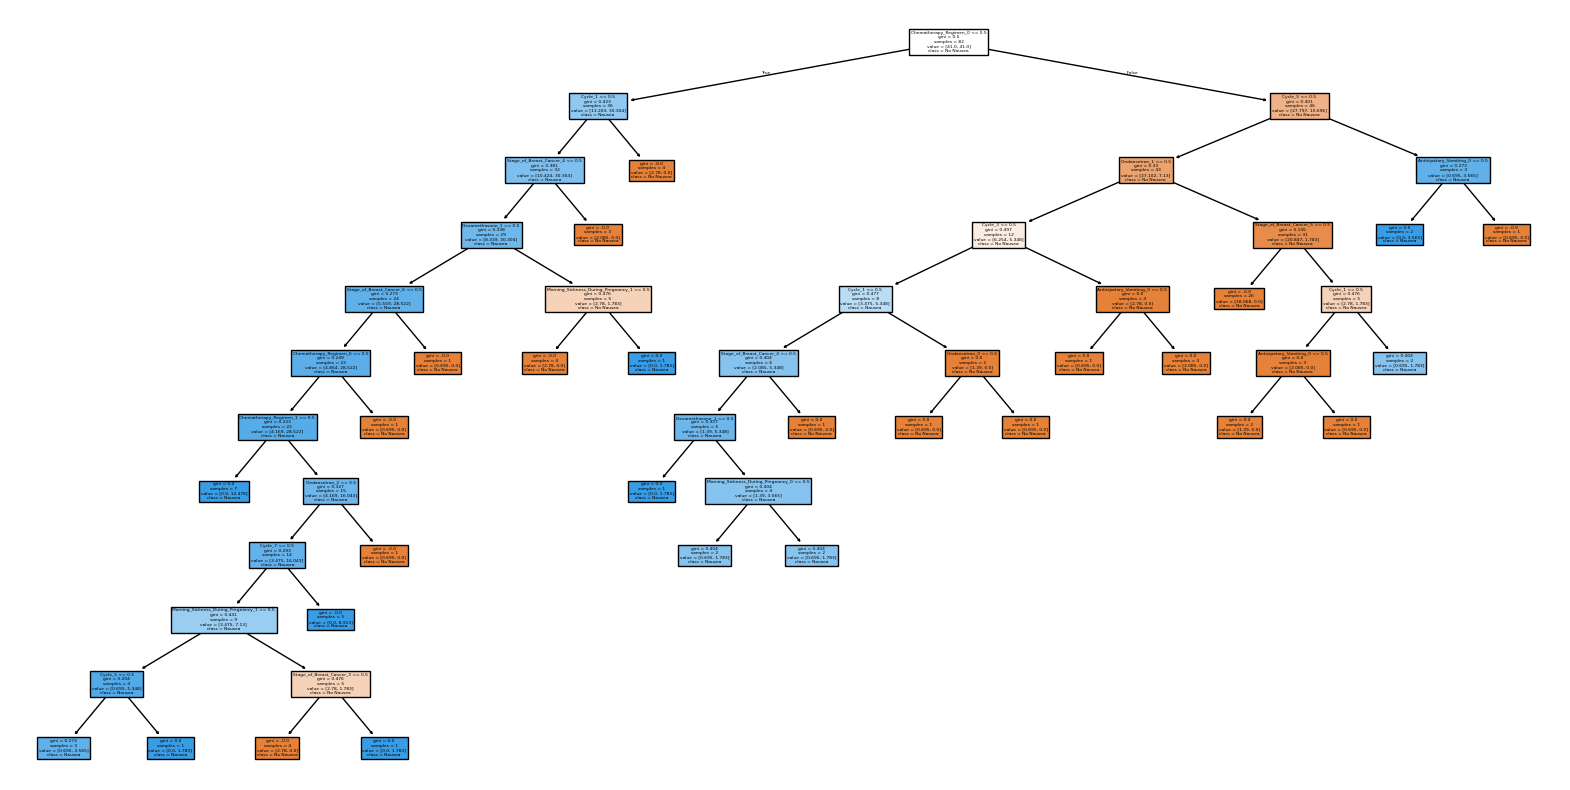

In [127]:
X = df_highly_relevant.drop(columns=['Nausea_within_24_hours_post_Chemotherapy'])
y = df_highly_relevant['Nausea_within_24_hours_post_Chemotherapy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = DecisionTreeClassifier(random_state=42,class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No Nausea', 'Nausea'], filled=True)
plt.show()

##### **Methodology, results, and conclusion**

- I used the `data_view` sheet from the Google Sheet file as it was already cleaned.
- First, I decided to use only the numeric variables and exclude the categorical variables to see the performance of a decision tree model.
  - I got an accuracy score of around 65%, which was okay but not so good.
- Then, I decided to work with the most important features for training the model.
  - For that, I asked ChatGPT and Perplexity to make a chart of the features in terms of relevancy, assuming the role of an oncologist.
  - ChatGPT provided the following results:

    **Highly Relevant Features:**
      - **Chemotherapy_Regimen:** Different regimens have varying emetogenic potential (the likelihood of causing nausea and vomiting).
      - **Chemotherapy_Frequency:** Frequent chemotherapy might correlate with cumulative effects on nausea.
      - **Stage_of_Breast_Cancer:** Advanced stages may require more aggressive chemotherapy, influencing nausea.
      - **Ondansetron, Dexamethasone, Granisetron, Palonosetron:** These are antiemetic medications commonly used to prevent chemotherapy-induced nausea and vomiting (CINV). Their presence or absence directly affects nausea outcomes.
      - **Morning_Sickness_During_Pregnancy:** This may indicate a predisposition to nausea and vomiting.
      - **Cycle:** The treatment cycle could affect how the body responds, with early cycles often being more severe for nausea.
      - **Anticipatory_Vomiting:** Patients with anticipatory nausea may have worse outcomes post-chemotherapy.

    **Moderately Relevant Features:**
      - **Smoking_Status and Drinking_Status:** Lifestyle factors can influence chemotherapy tolerance and nausea.
      - **Other_Antiemetics:** Different combinations of antiemetics may have varying efficacy.
      - **Comorbidities:** Certain comorbidities could worsen chemotherapy side effects or reduce the effectiveness of antiemetics.
      - **Metoclopramide_10mg_TDS_PO and Metoclopramide_10mg_IV:** Metoclopramide is sometimes used to manage nausea; its administration could influence outcomes.
      - **Last_Meal_Before_Chemotherapy:** Timing and composition of meals can influence nausea severity.

    **Less Relevant Features:**
      - **CINV_Route, CINV_Frequency, and CINV_Time_of_Administration:** These features are less likely to vary significantly in your dataset, as many patients might follow a standardized protocol.
      - **Oral_Dexamethasone:** If dexamethasone is already included, the oral route may not add much additional information.

- Then, I created a `highly_relevant_features` variable and only included the most relevant features suggested by ChatGPT.
- I trained the decision tree on these features and got an accuracy score of 68%, which was an improvement on the previous model but not by much.
- I thought this might be due to the imbalance in the class of target variables, and it was like that as I found:
  - `Nausea_within_24_hours_post_Chemotherapy`
    -  0: 79
    -  1: 31
- So, I decided to fix that using the parameter that `DecisionTreeClassifier` takes for `class_weight='balanced'`.
- Then, I trained the model and obtained an accuracy of 75%, which is not awesome but definitely an improvement over the previous two models.
- Further suggestions would be to do feature selection or consult a domain expert (a cancer doctor) to come up with good feature selection or create an ensemble model where one of the models is decision trees and others are logistic regression or something else.
